In [1]:
from datetime import date
import pandas as pd
import matplotlib.dates as mdates
from pvoutput import PVOutput

In [2]:
# Set API key and System ID here, or in ~/.pvoutput.yml
API_KEY = None
SYSTEM_ID = None

pv = PVOutput(API_KEY, SYSTEM_ID)

## Search

Search for PV systems within 5km of a point in the UK.

See [the PVOutput.org API docs for details of how to search](https://pvoutput.org/help.html#search).

In [3]:
pv_systems = pv.search(query='5km', lat=52.0668589, lon=-1.3484038)
pv_systems.head()

,name,system_AC_capacity_W,address,orientation,num_outputs,last_output,panel,inverter,distance_km,latitude,longitude
system_id,,,,,,,,,,,
68309,Thorn House,3960,United Kingdom OX16,SE,0,No Outputs,Evolution Ultra PLM-330MB-66,Growatt,1.0,52.06,-1.34
61190,Banbury OX16,5600,United Kingdom OX16,S,381,Today,SunPower,SolarEdge 5K HD,1.0,52.06,-1.34
7191,Banbury Power Plant 2,3920,United Kingdom OX16,SE,1,387 weeks ago,Suntech STP245S,SMA SB3800V,1.0,52.06,-1.34
62751,Banbury PW2,5600,United Kingdom OX16,S,83,32 weeks ago,Sunpower,Energy Monitor,1.0,52.06,-1.34
38924,CotonMacy Solar,3900,United Kingdom OX16,S,1510,Today,LG LG300 N1C-B3 LG,Enphase m250,1.0,52.06,-1.34


## Get PV systems for a country

If you haven't paid for a commercial license, then one way to get all the PV systems for a specific country is to scrape the PVOutput.org/map.jsp website.  This can be done using `pvoutput.mapscraper.get_pv_systems_for_country`:

In [26]:
from pvoutput.mapscraper import get_pv_systems_for_country

In [32]:
pv_systems_for_uk = get_pv_systems_for_country(
    country='United Kingdom',  # See pvoutput.consts.PV_OUTPUT_COUNTRY_CODES for all recognised strings
    sort_by='capacity',
    ascending=False,
    max_pages=1  # For this demo, we'll just scrape the first page of the map
)

Reading page  0

In [34]:
pv_systems_for_uk.head()

,name,panel,inverter,address,orientation,shade,array_tilt_degrees,timeseries_duration,total_energy_gen_Wh,average_daily_energy_gen_Wh,average_efficiency_kWh_per_kW,system_AC_capacity_W
system_id,,,,,,,,,,,,
24768,mfl_qfa,1050x240W qidong,aurora trio,United Kingdom OX7,South 180.0°,No,NaN,446 days,307029000.0,688405.0,2.732,252000.0
35328,Semtek,408x245W et,samil lake,United Kingdom SA14,South 180.0°,No,10.0,12 days,90000.0,7500.0,0.075,99960.0
26965,mfl_phc,336x250W Q Cells Pro-G3 250,Enphase M215,United Kingdom CV47,South 0.0°,Low,11.0,1857 days,414447000.0,223181.0,2.688,84000.0
66991,Ledbury Community Hospital,152x325W + 80x325W Unknown,Unknown,United Kingdom HR8,South 180.0° / South West 225.0°,No,40.0,1496 days,297464000.0,198840.0,2.651,75400.0
11542,Wray Farms Solar System,200x250W Emmvee ES 230 M60 B,SMA TRI-Power 1700 TL,United Kingdom PE11,South 180.0°,No,15.0,2481 days,298896000.0,120474.0,2.473,50000.0


## Check how many API requests we have left this hour

In [35]:
pv.rate_limit_info()

{'rate_limit_remaining': 897,
 'rate_limit_total': 900,
 'rate_limit_reset_time': Timestamp('2019-09-03 12:00:00+0000', tz='UTC')}

## Get rid of systems with < 50 outputs

In [5]:
pv_systems = pv_systems.query('num_outputs >= 50')
pv_systems.head()

,name,system_AC_capacity_W,address,orientation,num_outputs,last_output,panel,inverter,distance_km,latitude,longitude
system_id,,,,,,,,,,,
61190,Banbury OX16,5600,United Kingdom OX16,S,381,Today,SunPower,SolarEdge 5K HD,1.0,52.06,-1.34
62751,Banbury PW2,5600,United Kingdom OX16,S,83,32 weeks ago,Sunpower,Energy Monitor,1.0,52.06,-1.34
38924,CotonMacy Solar,3900,United Kingdom OX16,S,1510,Today,LG LG300 N1C-B3 LG,Enphase m250,1.0,52.06,-1.34
23236,Tedsolar,3000,United Kingdom OX16,SE,691,212 weeks ago,Renesolar,Samil SR3300tl,1.0,52.06,-1.34
40100,100061786,3900,United Kingdom OX17,S,62,190 weeks ago,Caymax SSE195,Enecsys SMI-S240W,4.7,52.07,-1.28


## Get metadata for one PV system

In [6]:
pv_system_id = pv_systems.index[0]
metadata = pv.get_metadata(pv_system_id)
metadata

name                                  Banbury OX16
system_AC_capacity_W                          5600
address                                       OX16
num_panels                                      16
panel_capacity_W_each                          350
panel_brand                               SunPower
num_inverters                                    1
inverter_capacity_W                           5000
inverter_brand                     SolarEdge 5K HD
orientation                                      S
array_tilt_degrees                               1
shade                                           No
install_date                                   NaT
latitude                                     52.06
longitude                                    -1.34
status_interval_minutes                         15
secondary_num_panels                             0
secondary_panel_capacity_W_each                  0
secondary_orientation                          NaN
secondary_array_tilt_degrees   

## Get power generation statistics for one PV system

In [7]:
pv.get_statistic(pv_system_id)

,total_energy_gen_Wh,energy_exported_Wh,average_daily_energy_gen_Wh,minimum_daily_energy_gen_Wh,maximum_daily_energy_gen_Wh,average_efficiency_kWh_per_kW,num_outputs,actual_date_from,actual_date_to,record_efficiency_kWh_per_kW,record_efficiency_date,query_date_from,query_date_to
61190,5802225.0,0.0,15228.0,472.0,34430.0,2.719,381.0,2018-08-17,2019-09-03,688.599976,2019-06-22,NaT,2019-09-03 12:45:43.596839


## Get timeseries of power data for one day

In one API request, PVOutput.org allows us to retrieve timeseries data for one day and one PV system. Only able to search by system_id if you have donated.

In [8]:
# Get timeseries for 2019-07-01
DATE = date(2019, 7, 1)
status = pv.get_status(pv_system_id, date=DATE)

# The timestamps are localtime, local to the PV system
# and we know this PV system is from the United Kingdom.
status = status.tz_localize('Europe/London')

status.head()

,cumulative_energy_gen_Wh,energy_efficiency_kWh_per_kW,instantaneous_power_gen_W,average_power_gen_W,power_gen_normalised,energy_consumption_Wh,power_demand_W,temperature_C,voltage
datetime,,,,,,,,,
2019-07-01 04:30:00+01:00,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:45:00+01:00,0.0,0.000,0.0,0.0,0.000,NaN,NaN,NaN,NaN
2019-07-01 05:00:00+01:00,0.0,0.000,0.0,0.0,0.000,NaN,NaN,NaN,NaN
2019-07-01 05:15:00+01:00,5.0,0.001,20.0,20.0,0.004,NaN,NaN,NaN,NaN
2019-07-01 05:30:00+01:00,16.0,0.003,44.0,44.0,0.008,NaN,NaN,NaN,NaN


### Plot timeseries

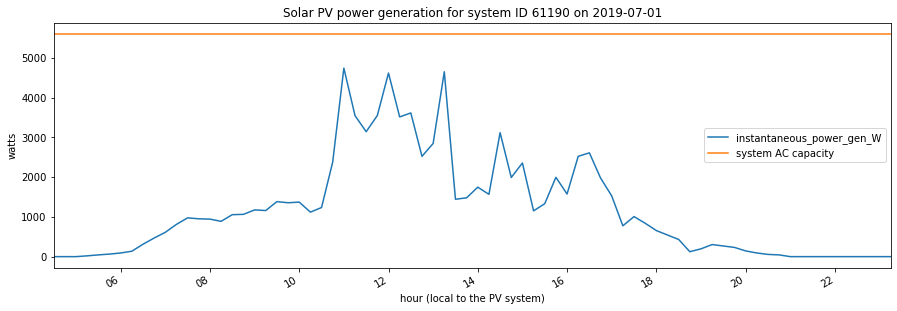

In [14]:
# Plot Solar PV power output for 2019-07-01
ax = status['instantaneous_power_gen_W'].plot(figsize=(15, 5))
ax.set_xlabel('hour (local to the PV system)')
ax.set_ylabel('watts')
ax.set_title('Solar PV power generation for system ID {} on {}'.format(pv_system_id, DATE))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H', tz=status.index.tz))

# Plot the system size
system_size = metadata['system_AC_capacity_W']
ax.plot(ax.get_xlim(), (system_size, system_size), label='system AC capacity')

ax.legend();

## Get batch status

If you have paid for a 'PVOutput Data Services' subscription, and you've added `data_service_url` to `~/.pvoutput.yml`, then you can use the PVOutput.org download batch status API to download a year of data at a time:

In [18]:
batch_status = pv.get_batch_status(pv_system_id)

In [20]:
batch_status.head()

,cumulative_energy_gen_Wh,instantaneous_power_gen_W,temperature_C,voltage
datetime,,,,
2018-09-03 06:30:00,15.0,61.0,NaN,NaN
2018-09-03 06:45:00,39.0,95.0,NaN,NaN
2018-09-03 07:00:00,77.0,150.0,NaN,NaN
2018-09-03 07:15:00,144.0,269.0,NaN,NaN
2018-09-03 07:30:00,235.0,362.0,NaN,NaN


In [21]:
len(batch_status)

17902

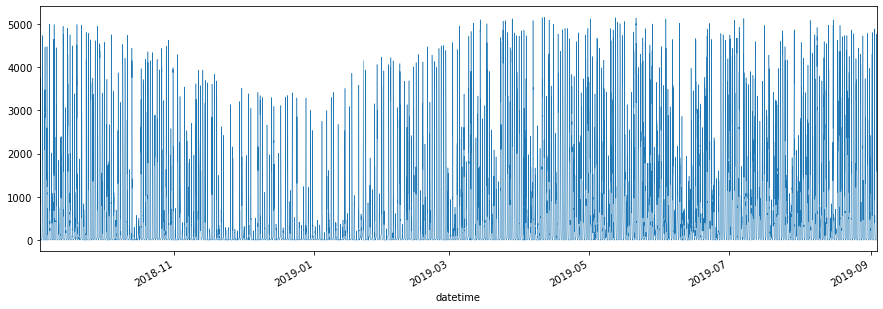

In [25]:
batch_status['instantaneous_power_gen_W'].plot(figsize=(15, 5), linewidth=0.5);

## Batch download multiple PV systems to disk

`PVOutput.download_multiple_systems_to_disk` can download multiple PV systems, and save them to disk as an HDF5 file.

See the `download_pv_timeseries.ipynb` notebook for a working example.

# Get Insolation Forecast Data
This only works in donation mode. Retrieves forecast of the power generated by a specified site assuming ideal weather conditions. Factoring in site age by reducing output by 1% each year. Also considers orientation and shade of site.

In [4]:
insolation_data = pv.get_insolation('2020-12-31', pv_system_id=75402)

In [6]:
insolation_data.head()

,predicted_power_gen_W,predicted_cumulative_energy_gen_Wh
time,,
2020-12-31 10:55:00,33.0,3.0
2020-12-31 11:00:00,146.0,15.0
2020-12-31 11:05:00,254.0,36.0
2020-12-31 11:10:00,356.0,66.0
2020-12-31 11:15:00,451.0,103.0
